In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as scio

In [5]:
df =pd.read_csv('metric.dat')
df

,v1,v2,v3,v4,v5,v6,metric
0,2.275946e-04,-0.000175,0.000988,0.001348,0.000878,0.001323,0.005414
1,-6.697208e-04,-0.000366,0.001386,0.001468,-0.000671,0.001302,0.007438
2,5.916631e-04,-0.000390,0.000269,0.000808,-0.000118,-0.000216,0.006403
3,4.302465e-04,0.000717,0.000826,0.001080,0.000302,0.000202,0.002673
4,1.757919e-05,0.000475,0.001099,-0.000308,-0.000746,-0.000077,0.006072
5,-2.030477e-03,-0.001113,-0.000111,-0.000063,0.000066,-0.000112,0.006680
6,1.021833e-04,0.001881,0.000584,0.000550,0.000318,0.002472,0.007465
7,-1.391211e-03,-0.000394,0.001396,-0.000201,0.000822,0.000898,0.014228
8,-1.412801e-03,-0.000881,0.000954,-0.001583,0.001353,0.000437,0.015550
9,4.392437e-04,0.001525,-0.000910,0.001313,-0.002467,-0.000279,0.011068


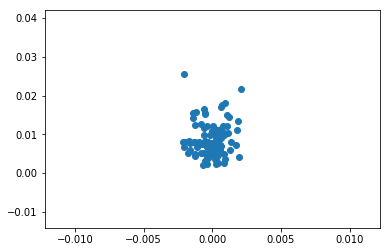

In [6]:
plt.scatter(df.v1,df.metric)

In [43]:
scio.minimize(df.metric, )

In [44]:
X = np.transpose([df.v1,df.v2,df.v3,df.v4,df.v5,df.v6])
regr.fit(X, df.metric)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
regr.predict([[0,0,0,0,0,0]])

array([0.00583557])

In [46]:
min(df.metric)

0.002156869514006762

In [52]:
from scipy.interpolate import griddata

In [50]:
g1, g2, g3, g4, g5, g6 = np.mgrid[-.001:.001:10j, -.001:.001:10j,-.001:.001:10j,-.001:.001:10j,-.001:.001:10j,-.001:.001:10j]

In [55]:
grid_z0 = griddata(X, df.metric, (g1, g2, g3, g4, g5, g6), method='linear')

In [73]:
grid_z0[0][0][0][0][0][0]

nan

In [75]:
np.nanmin(grid_z0)

0.002607796316646215

In [83]:
np.unravel_index(np.nanargmin(grid_z0, axis=None), grid_z0.shape)

(5, 4, 6, 4, 1, 3)

In [84]:
g1[5, 4, 6, 4, 1, 3]

0.00011111111111111109